In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120
DATA_PATH = "BIKE DETAILS.csv"

In [4]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
# first 10 rows.
# (Show the shape and column names as well.)
# (Include your Python code and output in the code box below.
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head(10))   # first 10 rows

df.head(10).to_csv("q1_first10.csv", index=False)

Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [6]:
# Question 2: Check for missing values in all columns and describe your approach for
# handling them.
# (Include your Python code and output in the code box below.)
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_count", ascending=False)
display(missing_table)
from sklearn.impute import SimpleImputer
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
# median imputer:
num_imputer = SimpleImputer(strategy="median")
# mode imputer for categoricals:
cat_imputer = SimpleImputer(strategy="most_frequent")

,missing_count,missing_pct
ex_showroom_price,435,40.999057
selling_price,0,0.000000
name,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000


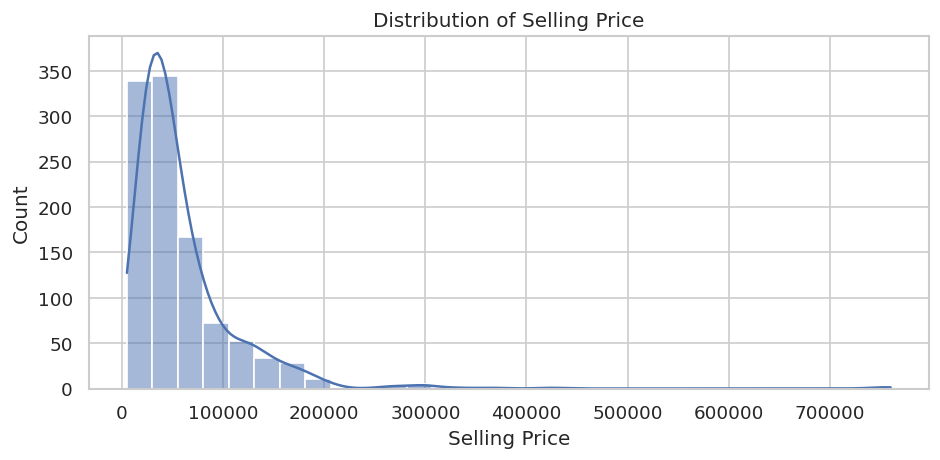

selling_price stats:
 count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [7]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
if 'selling_price' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['selling_price'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Selling Price")
    plt.xlabel("Selling Price")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("q3_selling_price_hist.png")
    plt.show()
    # Suggested interpretation text:
    # - report central tendency (mean, median), skew (left/right) and presence of long tail / outliers
    print("selling_price stats:\n", df['selling_price'].describe())
else:
    print("Column 'selling_price' not found: available columns:", df.columns.tolist())

,seller_type,avg_selling_price
0,Individual,59711.923223
1,Dealer,46666.666667


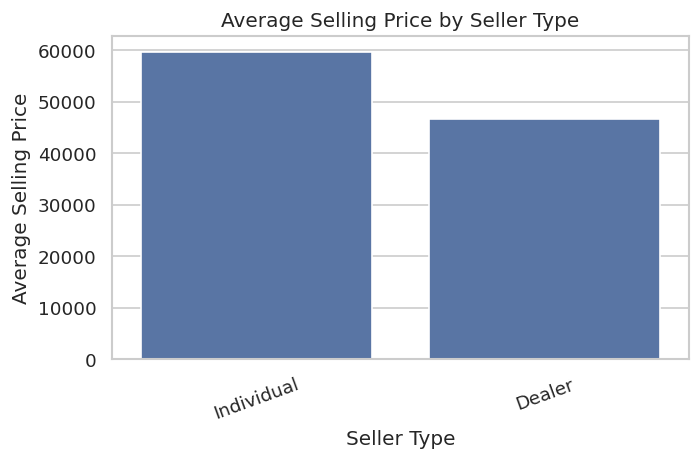

In [8]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
if {'seller_type','selling_price'}.issubset(df.columns):
    avg_by_seller = df.groupby('seller_type', dropna=False)['selling_price'].mean().sort_values(ascending=False)
    display(avg_by_seller.reset_index().rename(columns={'selling_price':'avg_selling_price'}))
    plt.figure(figsize=(6,4))
    sns.barplot(x=avg_by_seller.index, y=avg_by_seller.values)
    plt.title("Average Selling Price by Seller Type")
    plt.xlabel("Seller Type")
    plt.ylabel("Average Selling Price")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.savefig("q4_avg_price_by_seller.png")
    plt.show()
    # One simple observation to include:
    # "Observation: Seller type X has the highest average selling price while Y has the lowest — could reflect listings by dealerships vs individuals."
else:
    print("Required columns for Q4 missing.")

,owner,avg_km_driven
0,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,1st owner,32816.583333


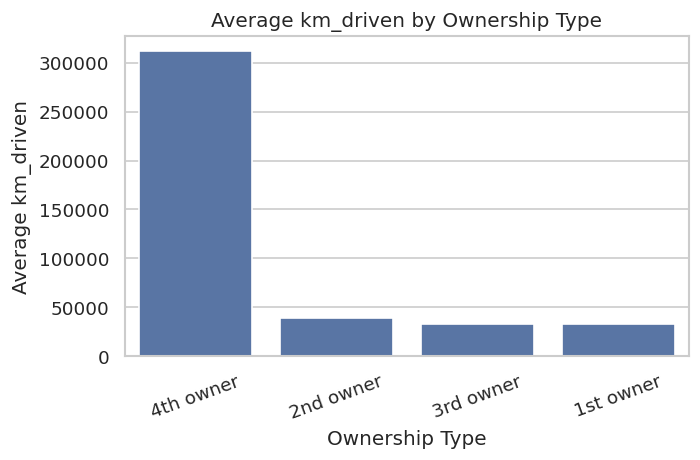

In [9]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
if {'owner','km_driven'}.issubset(df.columns):
    avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)
    display(avg_km_by_owner.reset_index().rename(columns={'km_driven':'avg_km_driven'}))
    plt.figure(figsize=(6,4))
    sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values)
    plt.title("Average km_driven by Ownership Type")
    plt.xlabel("Ownership Type")
    plt.ylabel("Average km_driven")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.savefig("q5_avg_km_by_owner.png")
    plt.show()
else:
    print("Required columns for Q5 missing.")

In [11]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
if 'km_driven' in df.columns:
    q1 = df['km_driven'].quantile(0.25)
    q3 = df['km_driven'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    before = df['km_driven'].describe()
    cleaned = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)].copy()
    after = cleaned['km_driven'].describe()

    print("IQR bounds: lower=%.2f, upper=%.2f" % (lower, upper))
    print("\nBefore (km_driven):")
    display(before)
    print("\nAfter removing outliers (km_driven):")
    display(after)
    # You may want to replace outliers instead of dropping, or keep them for some models
else:
    print("km_driven missing.")

IQR bounds: lower=-30750.00, upper=87250.00

Before (km_driven):


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



After removing outliers (km_driven):


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


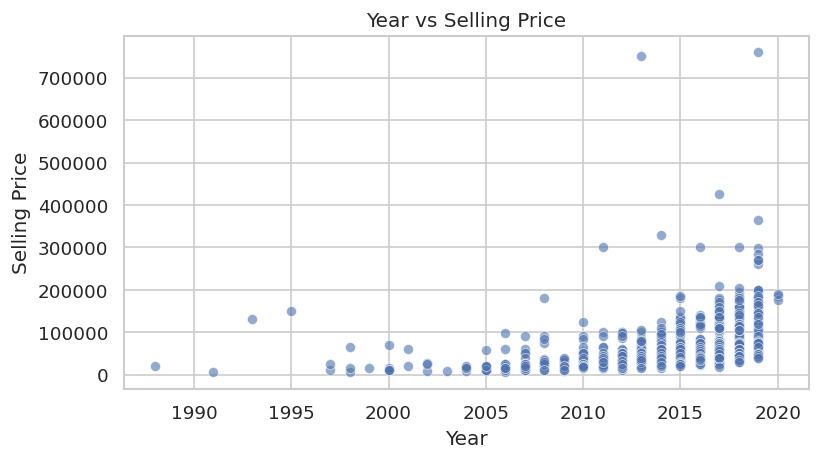

Correlation (year vs selling_price): 0.40218840061476036


In [12]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
if {'year','selling_price'}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
    plt.title("Year vs Selling Price")
    plt.xlabel("Year")
    plt.ylabel("Selling Price")
    plt.tight_layout()
    plt.savefig("q7_year_vs_price.png")
    plt.show()
    print("Correlation (year vs selling_price):", df[['year','selling_price']].corr().iloc[0,1])
else:
    print("Required columns for Q7 missing.")

In [13]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
if 'seller_type' in df.columns:
    df_ohe = pd.get_dummies(df, columns=['seller_type'], prefix='seller', drop_first=False)
    display(df_ohe.head(5))
    df_ohe.head(5).to_csv("q8_ohe_first5.csv", index=False)
else:
    print("seller_type missing for Q8.")

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


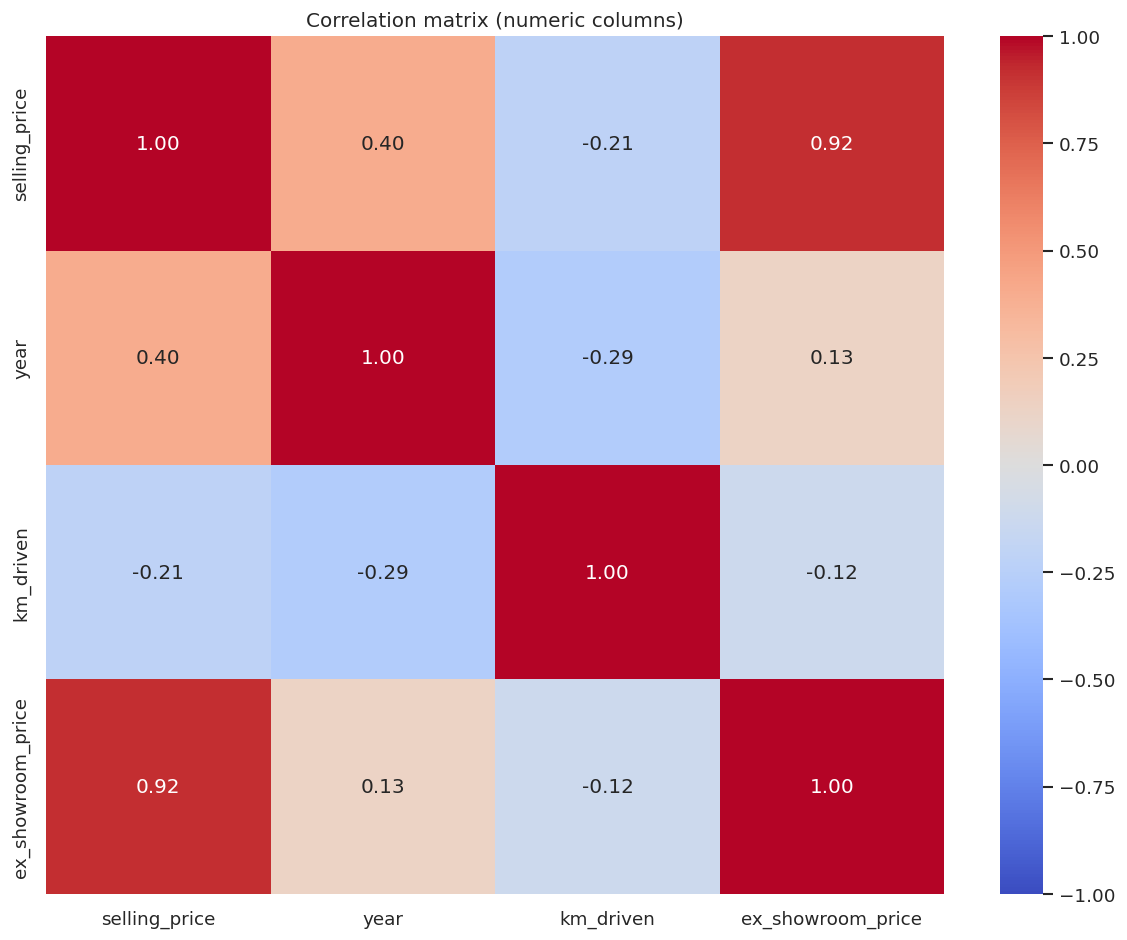

Strong correlations (abs > 0.5):
  ex_showroom_price <-> selling_price: corr = 0.92


In [14]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
numeric = df.select_dtypes(include=[np.number]).copy()
if not numeric.empty:
    corr = numeric.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation matrix (numeric columns)")
    plt.tight_layout()
    plt.savefig("q9_corr_heatmap.png")
    plt.show()

    # Highlight strong correlations
    strong = []
    for i in corr.columns:
        for j in corr.index:
            if i!=j and abs(corr.loc[i,j])>0.5:
                pair = tuple(sorted([i,j]))
                if pair not in [(x[0],x[1]) for x in strong]:
                    strong.append((pair[0], pair[1], corr.loc[pair[0], pair[1]]))
    if strong:
        print("Strong correlations (abs > 0.5):")
        for a,b,cval in sorted(strong, key=lambda x: -abs(x[2])):
            print(f"  {a} <-> {b}: corr = {cval:.2f}")
    else:
        print("No strong correlations (abs > 0.5) found.")
else:
    print("No numeric columns found for correlation heatmap.")


In [15]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.
report = """
Key findings (example template - edit after you run):
1. Dataset shape: {shape}
2. Missing values: see missing_table.csv or the above display; for small counts I used median/mode imputation for numeric/categorical columns respectively.
3. Selling price distribution: central tendency is around {price_mean:.2f} (mean) with median {price_median:.2f}; distribution is [describe skew/outliers after running].
4. Seller_type effect: average selling prices differ by seller_type — observation: [paste observation derived from Q4].
5. Ownership vs km_driven: 1st/2nd owners have differing average km_driven as shown in the bar plot.
6. km_driven outliers: after IQR filtering, record count changed from {n_before} to {n_after}; I recommend [dropping/replacing] outliers depending on modeling goals.
7. Age vs price: scatter shows [negative/positive] correlation (value: {year_price_corr:.2f}) — older bikes generally sell for less.
8. Correlations: strongest correlations are: [paste strong list from Q9].
9. Data cleaning/feature engineering performed: missing-value imputation, IQR-based outlier removal on km_driven, one-hot encoding for seller_type, scaling planned depending on model choice.
""".format(
    shape=df.shape,
    price_mean=df['selling_price'].mean() if 'selling_price' in df.columns else np.nan,
    price_median=df['selling_price'].median() if 'selling_price' in df.columns else np.nan,
    n_before=len(df),
    n_after=len(cleaned) if 'cleaned' in locals() else 'N/A',
    year_price_corr = df[['year','selling_price']].corr().iloc[0,1] if {'year','selling_price'}.issubset(df.columns) else np.nan
)

print(report)
# Save some useful tables for your report
missing_table.to_csv("q2_missing_summary.csv")
if 'avg_by_seller' in locals():
    avg_by_seller.reset_index().to_csv("q4_avg_price_by_seller.csv", index=False)
if 'avg_km_by_owner' in locals():
    avg_km_by_owner.reset_index().to_csv("q5_avg_km_by_owner.csv", index=False)
if 'df_ohe' in locals():
    df_ohe.head(100).to_csv("q8_ohe_preview.csv", index=False)


Key findings (example template - edit after you run):
1. Dataset shape: (1061, 7)
2. Missing values: see missing_table.csv or the above display; for small counts I used median/mode imputation for numeric/categorical columns respectively.
3. Selling price distribution: central tendency is around 59638.15 (mean) with median 45000.00; distribution is [describe skew/outliers after running].
4. Seller_type effect: average selling prices differ by seller_type — observation: [paste observation derived from Q4].
5. Ownership vs km_driven: 1st/2nd owners have differing average km_driven as shown in the bar plot.
6. km_driven outliers: after IQR filtering, record count changed from 1061 to 1022; I recommend [dropping/replacing] outliers depending on modeling goals.
7. Age vs price: scatter shows [negative/positive] correlation (value: 0.40) — older bikes generally sell for less.
8. Correlations: strongest correlations are: [paste strong list from Q9].
9. Data cleaning/feature engineering perfor